## Regression analysis

### This script contains the following:

#### 01. Import libraries and data
#### 02. Clean data
#### 03. Data prep for regression analysis
#### 04. Regression analysis
#### 05. Evaluate performance after removing outliers 

#### Bonus tasks: Additional regression analyses with different variables

About: I'm using linear regression to test four relationships that looked promising because of their correlations. None of the relationships were strong enough to assume linear relationships.

### 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\jacym\Desktop\Career Foundry projects\german rent\02 data'

In [4]:
df = pd.read_csv(os.path.join(path, 'cleaned data', 'rent_pop_merged.csv'))

In [75]:
# importing an additional dataframe I made that includes district-level population -- so there are more datapoints to work with
df2 = pd.read_csv(os.path.join(path, 'cleaned data', 'rent_district_pop_merged.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['scoutId', 'regio1', 'baseRent', 'totalRent', 'pricetrend',
       'livingSpace', 'plz', 'picturecount', 'newlyConst', 'yearConstructed',
       'firingTypes', 'heatingType', 'hasKitchen', 'cellar', 'condition',
       'street', 'lift', 'typeOfFlat', 'noRooms', 'floor', 'balcony', 'garden',
       'baseRentRange', 'noRoomsRange', 'livingSpaceRange',
       'yearConstructedRange', 'regio2', 'regio3', 'description', 'date',
       'population', 'populationTrend', 'popTrendCat', 'surfaceArea',
       'populationDensity', 'space/person', 'people/apt'],
      dtype='object')

In [7]:
df.head(20)

,scoutId,regio1,baseRent,totalRent,pricetrend,livingSpace,plz,picturecount,newlyConst,yearConstructed,...,description,date,population,populationTrend,popTrendCat,surfaceArea,populationDensity,space/person,people/apt,price/unit
0,96107057,Nordrhein_Westfalen,595.00,840.00,4.62,86.00,44269,6,False,1965.0,...,Die ebenerdig zu erreichende Erdgeschosswohnun...,2019-05-10,17935147,-0.02,stable,34098,526,41.41,2.12,9.767442
1,91383597,Nordrhein_Westfalen,300.00,NaN,1.92,60.00,45888,7,False,1953.0,...,Sie sind auf der Suche nach einer gepflegten u...,2019-10-08,17935147,-0.02,stable,34098,526,41.41,2.12,NaN
2,101730329,Nordrhein_Westfalen,950.00,1150.00,3.45,123.44,59065,3,False,1951.0,...,Die angebotene Wohnfläche befindet sich im dri...,2019-10-08,17935147,-0.02,stable,34098,526,41.41,2.12,9.316267
3,92798563,Nordrhein_Westfalen,972.60,1320.65,3.76,87.00,44229,12,True,2018.0,...,Der attraktive Neubau mit 10 Wohnungen liegt i...,2019-05-10,17935147,-0.02,stable,34098,526,41.41,2.12,15.179885
4,111227157,Nordrhein_Westfalen,329.00,NaN,3.12,65.00,47166,5,False,1914.0,...,Gepflegtes Mehrfamilienhaus in Duisburg-Oberm...,2019-05-10,17935147,-0.02,stable,34098,526,41.41,2.12,NaN
5,107002234,Nordrhein_Westfalen,315.18,445.18,3.90,60.00,40699,14,False,1976.0,...,Zur Anmietung dieser Wohnung benötigen Sie zwi...,2018-09-22,17935147,-0.02,stable,34098,526,41.41,2.12,7.419667
6,113850656,Nordrhein_Westfalen,250.00,350.00,3.80,36.00,51427,5,False,NaN,...,"Im Untergeschoß gelegene kleine Wohnung, mit v...",2019-10-08,17935147,-0.02,stable,34098,526,41.41,2.12,9.722222
7,113061748,Nordrhein_Westfalen,400.00,570.00,3.13,70.00,45329,6,False,NaN,...,"Nachmieter für eine gepflegte 3,5-Raum-Wohnung...",2019-10-08,17935147,-0.02,stable,34098,526,41.41,2.12,8.142857
8,102534814,Nordrhein_Westfalen,553.98,753.98,3.70,87.33,59759,8,False,1994.0,...,"Großzügiger Wohn/Essbereich (29,27 qm),weiße E...",2019-10-08,17935147,-0.02,stable,34098,526,41.41,2.12,8.633688
9,114832896,Nordrhein_Westfalen,400.00,NaN,3.03,65.00,59425,10,False,1975.0,...,Diese große Dachgeschosswohnung befindet sich ...,2020-02-01,17935147,-0.02,stable,34098,526,41.41,2.12,NaN


In [8]:
df.shape

(268772, 38)

In [9]:
# Create subset with just space and rent
rent_space = df[['livingSpace', 'totalRent']]

##### Missing values

In [10]:
# Check for missing values

rent_space.isnull().sum()


livingSpace       71
totalRent      40549
dtype: int64

In [12]:
# drop blank values 
rent_space_trim = rent_space.dropna(inplace=False)

In [13]:
rent_space_trim.isnull().sum()

livingSpace    0
totalRent      0
dtype: int64

##### Duplicates check

In [14]:
dups = rent_space_trim.duplicated()

In [15]:
dups.shape # No dups

(228169,)

##### Extreme values checks

C:\Users\jacym\AppData\Local\Temp\ipykernel_72304\4015888678.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rent_space_trim['totalRent'], bins=25) # Shows extreme values


<Axes: xlabel='totalRent', ylabel='Density'>

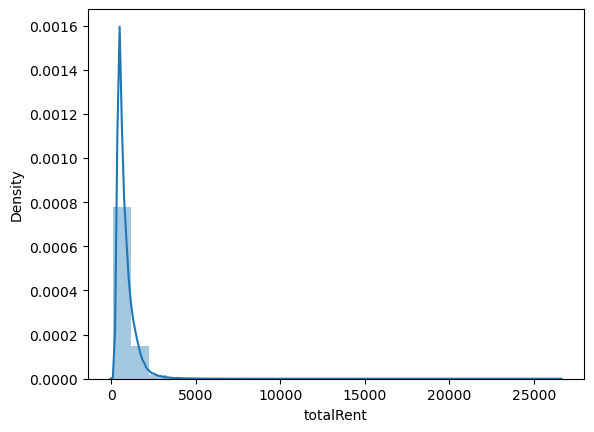

In [16]:
sns.distplot(rent_space_trim['totalRent'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [17]:
rent_space_trim['totalRent'].mean() # Check the mean

814.7876570875098

In [18]:
rent_space_trim['totalRent'].median() # Check the median

650.0

In [19]:
rent_space_trim['totalRent'].max() # Check the max

26500.0

### 3. Data prep for regression analysis 

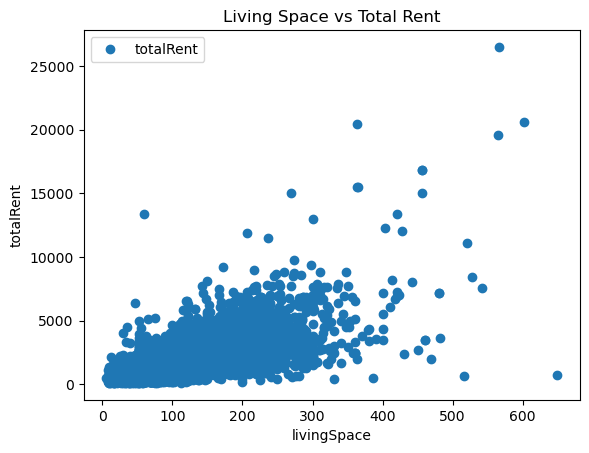

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

rent_space_trim.plot(x = 'livingSpace', y='totalRent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Living Space vs Total Rent')  
plt.xlabel('livingSpace')  
plt.ylabel('totalRent')  
plt.show()

Hypothesis: I predict a moderate, positive relationship between living space and total rent, i.e. that rent will tend to increase when the living space increases.

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = rent_space_trim['livingSpace'].values.reshape(-1,1)
y = rent_space_trim['totalRent'].values.reshape(-1,1)

In [22]:
X

array([[ 86.  ],
       [123.44],
       [ 87.  ],
       ...,
       [ 78.55],
       [ 70.  ],
       [ 44.  ]])

In [23]:
y

array([[ 840.  ],
       [1150.  ],
       [1320.65],
       ...,
       [ 910.  ],
       [ 610.  ],
       [ 450.  ]])

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [25]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

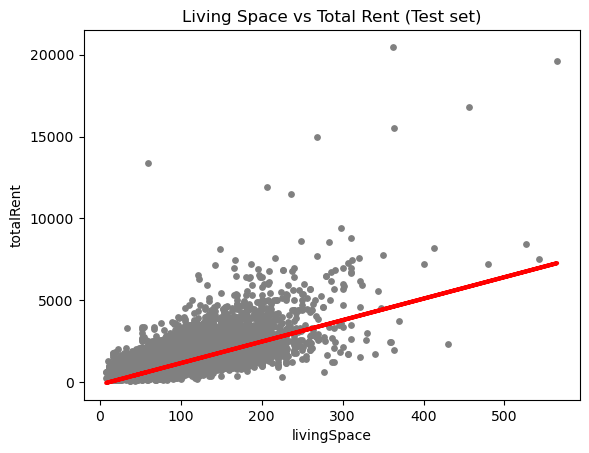

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Living Space vs Total Rent (Test set)')
plot_test.xlabel('livingSpace')
plot_test.ylabel('totalRent')
plot_test.show()

Observations: The points are generally clustered around the line, but there's so much variability that I don't expect the relationship to be especially strong. There are a lot of factors that influence rent other than apartment size.

In [29]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [30]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[13.11876487]]
Mean squared error:  153879.14179268343
R2 score:  0.5375771876024816


In [31]:
y_predicted

array([[424.0155189 ],
       [568.32193251],
       [644.54195642],
       ...,
       [319.06539991],
       [659.36616073],
       [607.67822713]])

In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,340.0,424.015519
1,450.0,568.321933
2,440.0,644.541956
3,310.0,17.333808
4,509.4,782.157800
5,410.0,771.662788
6,680.0,1237.378941
7,249.0,443.693666
8,430.0,581.440697
9,660.0,660.153287


##### Compare how the regression fits the training set

In [33]:
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [34]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[13.11876487]]
Mean squared error:  140419.45182198752
R2 score:  0.5460131284540084


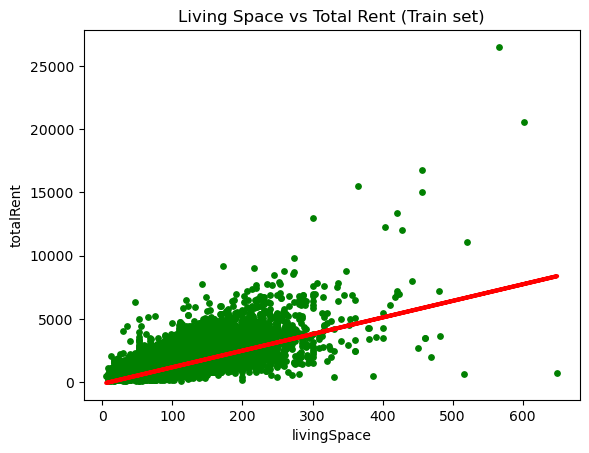

In [36]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Living Space vs Total Rent (Train set)')
plot_test.xlabel('livingSpace')
plot_test.ylabel('totalRent')
plot_test.show()

# Overall thoughts
While apartment size doesn't influence rent unilaterally, there is a relatively strong linear relationship here compared to other variables that might influence rent. That such a logical factor would still not reach an R-squared in the "passing" range is a testament to the sheer complexity of factors influencing the cost of housing. These findings suggest that although larger units do tend to be more expensive, there's a lot of variability in the market.

### Bonus: performance improvement after removing outliers

In [38]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

rent_space2 = rent_space_trim[[rent_space_trim['totalRent'] <=10000], 

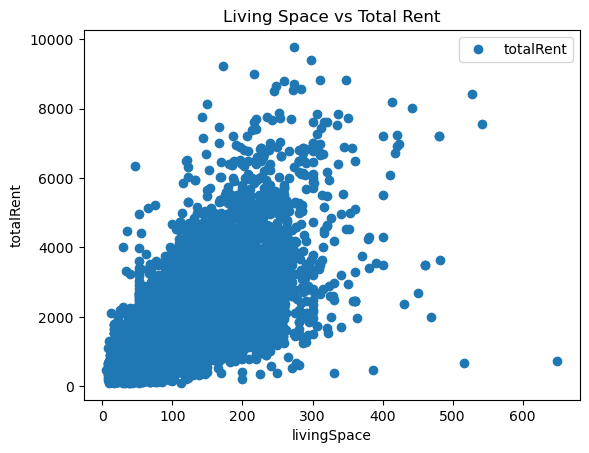

In [39]:
# See how the scatterplot looks without outliers.

rent_space2.plot(x = 'livingSpace', y='totalRent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Living Space vs Total Rent')  
plt.xlabel('livingSpace')  
plt.ylabel('totalRent')  
plt.show()

In [40]:
# Reshape again.

X_2 = rent_space2['livingSpace'].values.reshape(-1,1)
y_2 = rent_space2['totalRent'].values.reshape(-1,1)

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [42]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [43]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [44]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [46]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[12.94572167]]
Mean squared error:  136828.21201771052
R2 score:  0.5445230876155696


Observations: Eliminating outliers had a minimal but positive effect on the accuracy of the regression model.

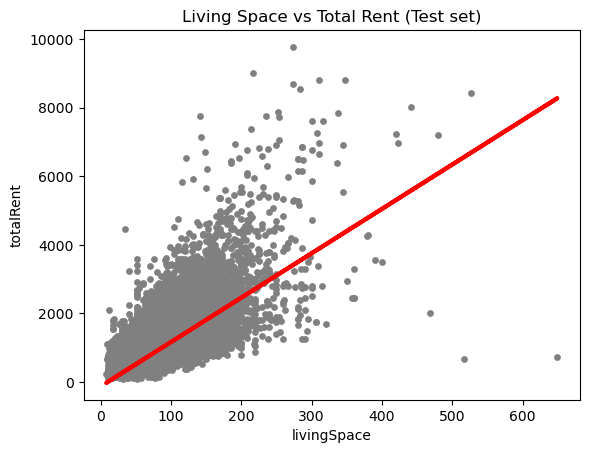

In [52]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Living Space vs Total Rent (Test set)')
plot_test.xlabel('livingSpace')
plot_test.ylabel('totalRent')
plot_test.show()

In [48]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,389.16,78.824299
1,609.00,705.656142
2,435.00,625.133753
3,530.00,829.676156
4,736.00,1075.644867
5,490.00,635.490330
6,760.00,52.932855
7,1220.00,1619.365178
8,407.00,308.222487
9,510.57,800.030453


## Linear regression, take 2: price per unit and population trend

Here I use linear regression to assess the relationship between price per unit (moderating the known relationship between rent and unit size) and the general population trend of the state in which the unit is located.

In [53]:
# Create subset with just price/unit and population trend
price_pop = df[['populationTrend', 'price/unit']]

In [54]:
# Check for missing values
price_pop.isnull().sum()

populationTrend        0
price/unit         40603
dtype: int64

In [55]:
# drop blank values 
price_pop_trim = price_pop.dropna(inplace=False)

In [56]:
price_pop_trim.isnull().sum()

populationTrend    0
price/unit         0
dtype: int64

C:\Users\jacym\AppData\Local\Temp\ipykernel_72304\3498814368.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price_pop_trim['price/unit'], bins=25) # Shows extreme values


<Axes: xlabel='price/unit', ylabel='Density'>

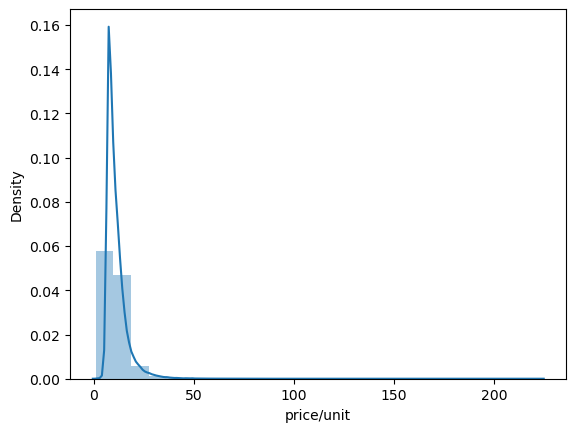

In [57]:
sns.distplot(price_pop_trim['price/unit'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

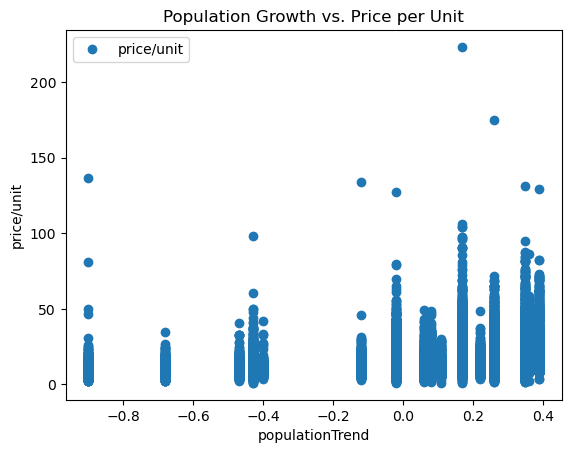

In [58]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

price_pop_trim.plot(x = 'populationTrend', y='price/unit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Population Growth vs. Price per Unit')  
plt.xlabel('populationTrend')  
plt.ylabel('price/unit')  
plt.show()

In [63]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_pop = price_pop_trim['populationTrend'].values.reshape(-1,1)
y_pop = price_pop_trim['price/unit'].values.reshape(-1,1)

In [64]:
X_pop

array([[-0.02],
       [-0.02],
       [-0.02],
       ...,
       [-0.4 ],
       [-0.4 ],
       [-0.4 ]])

In [65]:
y_pop

array([[ 9.76744186],
       [ 9.31626701],
       [15.17988506],
       ...,
       [11.58497772],
       [ 8.71428571],
       [10.22727273]])

In [66]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X_pop, y_pop, test_size=0.3, random_state=0)

### 4. Regression analysis

In [67]:
# Create a regression object.

regression_pop = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [68]:
# Fit the regression object onto the training set.

regression_pop.fit(X_train, y_train)

LinearRegression()

In [69]:
# Predict the values of y using X.

y_predicted = regression_pop.predict(X_test)

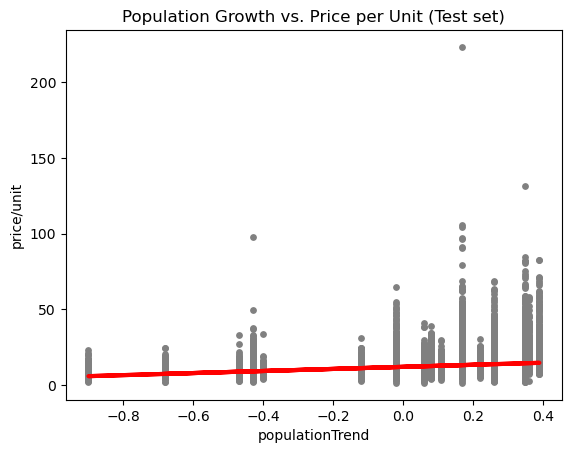

In [70]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Population Growth vs. Price per Unit (Test set)')
plot_test.xlabel('populationTrend')
plot_test.ylabel('price/unit')
plot_test.show()

In [71]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [72]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[12.94572167]]
Mean squared error:  23.31658188093533
R2 score:  0.21738695766758365


There is a modest relationship between population growth trend and price per unit, with price per unit sometimes tending to be higher if population is growing faster in the area. The population growth trend only accounts for a small portion of the variability in price per unit. A caveat is the small pool of data points for population growth, since there are just 16 federal states in Germany.

In [73]:
y_predicted

array([[ 7.44081317],
       [11.94247123],
       [ 9.14598668],
       ...,
       [11.94247123],
       [11.94247123],
       [13.57943779]])

In [74]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7.906977,7.440813
1,8.333333,11.942471
2,7.356629,9.145987
3,25.833333,11.942471
4,7.246088,9.145987
5,5.899281,9.145987
6,6.476190,14.466128
7,5.595506,9.145987
8,7.818182,5.940260
9,10.819672,9.145987


## Linear regression, take 3: price per unit and *district* population trend

Here, I assess the relationship between district-level population growth and price per unit.

In [76]:
# create price per unit variable 
df2['price/unit'] = df2['totalRent']/df['livingSpace']

In [77]:
# Create subset with just price/unit and population trend
price_dist_pop = df2[['districtPopTrend', 'price/unit']]

In [78]:
# Check for missing values
price_dist_pop.isnull().sum()

districtPopTrend        0
price/unit          39356
dtype: int64

In [79]:
# drop blank values 
price_dist_trim = price_dist_pop.dropna(inplace=False)

In [80]:
price_dist_trim.isnull().sum()

districtPopTrend    0
price/unit          0
dtype: int64

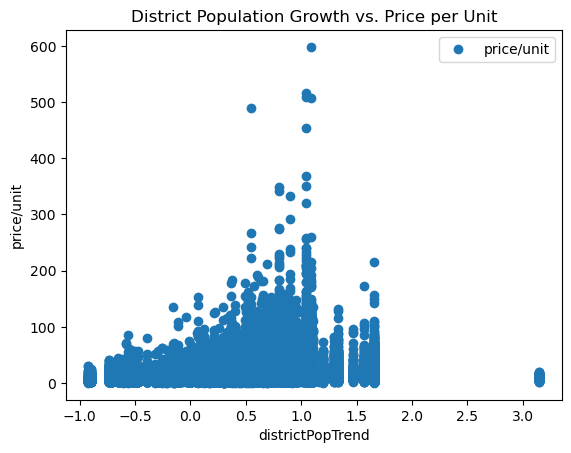

In [81]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

price_dist_trim.plot(x = 'districtPopTrend', y='price/unit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('District Population Growth vs. Price per Unit')  
plt.xlabel('districtPopTrend')  
plt.ylabel('price/unit')  
plt.show()

In [82]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_dist = price_dist_trim['districtPopTrend'].values.reshape(-1,1)
y_dist = price_dist_trim['price/unit'].values.reshape(-1,1)

In [83]:
X_dist

array([[ 0.33],
       [ 0.33],
       [ 0.33],
       ...,
       [-0.2 ],
       [-0.2 ],
       [-0.2 ]])

In [84]:
y_dist

array([[ 9.76744186],
       [22.01083333],
       [ 4.00032404],
       ...,
       [ 6.04386116],
       [ 1.96078431],
       [15.30054645]])

In [85]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X_dist, y_dist, test_size=0.3, random_state=0)

### 4. Regression analysis

In [86]:
# Create a regression object.

regression_dist = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [87]:
# Fit the regression object onto the training set.

regression_dist.fit(X_train, y_train)

LinearRegression()

In [88]:
# Predict the values of y using X.

y_predicted = regression_dist.predict(X_test)

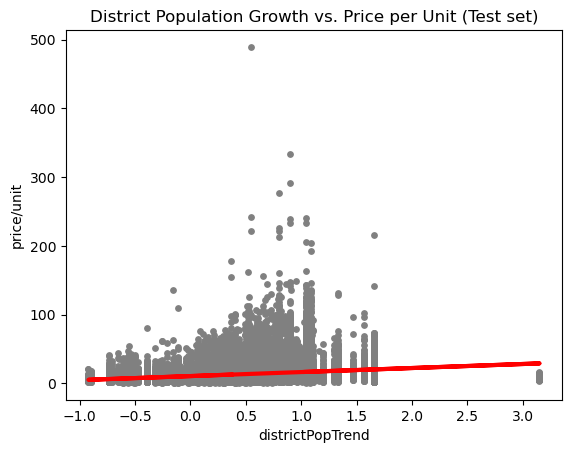

In [89]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('District Population Growth vs. Price per Unit (Test set)')
plot_test.xlabel('districtPopTrend')
plot_test.ylabel('price/unit')
plot_test.show()

In [90]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [91]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[12.94572167]]
Mean squared error:  137.85996152258795
R2 score:  0.06331340193048629


Observations: There is no clear linear relationship between district population growth and price per unit. Units in areas where the population is growing at a higher rate tend to have a higher cost per unit, but the effect is small. I think there was too much variability in the data to draw an accurate regression line.

In [92]:
y_predicted

array([[12.86612965],
       [12.45616628],
       [11.40197476],
       ...,
       [12.45616628],
       [13.86175497],
       [16.79006473]])

In [93]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,16.847826,12.866130
1,3.388442,12.456166
2,7.652325,11.401975
3,4.563957,12.456166
4,29.257721,13.744623
5,13.264536,14.623116
6,17.045455,11.050578
7,47.720588,17.082896
8,5.865031,18.371352
9,7.750000,13.510358


### Bonus: performance improvement after removing outliers

I will again assess the relationship between district population and unit price after removing some outliers in both categories.

In [95]:
# Clean extreme values from the df

price_dist_2 = price_dist_pop[(price_dist_pop['districtPopTrend'] <=2) & (price_dist_pop['price/unit'] < 250)]


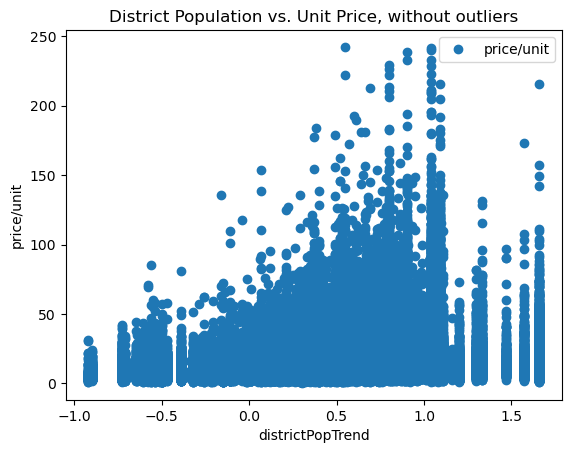

In [97]:
# See how the scatterplot looks without outliers.

price_dist_2.plot(x = 'districtPopTrend', y='price/unit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('District Population vs. Unit Price, without outliers')  
plt.xlabel('districtPopTrend')  
plt.ylabel('price/unit')  
plt.show()

In [98]:
# Reshape again.

X_4 = price_dist_2['districtPopTrend'].values.reshape(-1,1)
y_4 = price_dist_2['price/unit'].values.reshape(-1,1)

In [99]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.3, random_state=0)

In [100]:
# Run and fit the regression.

regression_dist = LinearRegression()  
regression_dist.fit(X_train_4, y_train_4)

LinearRegression()

In [101]:
# Predict.

y_predicted_4 = regression_dist.predict(X_test_4)

In [102]:
rmse = mean_squared_error(y_test_4, y_predicted_4)
r2 = r2_score(y_test_4, y_predicted_4)

In [103]:
print('Slope:' ,regression_dist.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.93173491]]
Mean squared error:  134.2609705717694
R2 score:  0.06788280878507846


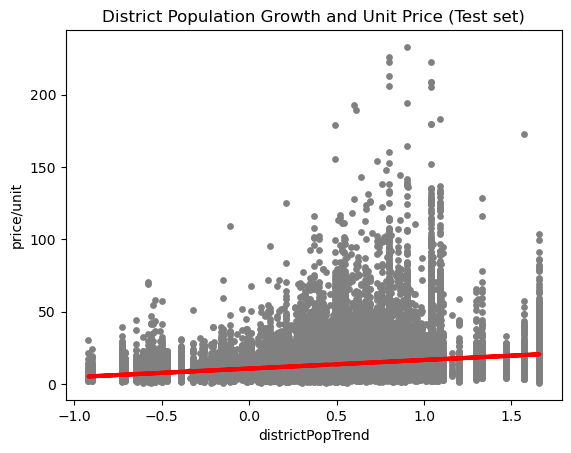

In [104]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_4, y_test_4, color='gray', s = 15)
plot_test.plot(X_test_4, y_predicted_4, color='red', linewidth =3)
plot_test.title('District Population Growth and Unit Price (Test set)')
plot_test.xlabel('districtPopTrend')
plot_test.ylabel('price/unit')
plot_test.show()

Observations: The regression line is minimally more accurate after removing outliers, but not enough to suggest a linear relationship between the two variables.